In [4]:
import boto3
rds = boto3.client('rds')

def lambda_handler(event, context):

    #Start DB Instances
    dbs = rds.describe_db_clusters()
    for db in dbs['DBClusters']:
        if (db['Status'] == 'stopped'):
            try:
                GetTags=rds.list_tags_for_resource(ResourceName=db['DBClusterArn'])['TagList']
                for tags in GetTags:
                    print(tags)
                #if tag "autostart=yes" is set for instance, start it
                    if(tags['Key'] == 'autostart' and tags['Value'] == 'yes'):
                        result = rds.start_db_cluster(DBClusterIdentifier=db['DBClusterIdentifier'])
                        print(result)
                        print ("Starting cluster: {0}.".format(db['DBClusterIdentifier']))
            except Exception as e:
                print ("Cannot start cluster {0}.".format(db['DBClusterIdentifier']))
                print(e)
                

if __name__ == "__main__":
    lambda_handler(None, None)

In [138]:


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_pickle("/home/markakis/tpc-ds-postgres-queries/metrics/2024-07-03 17:36:14.157556-sys_query_history_preprocessed.pkl")
df.columns

Index(['result_cache_hit', 'elapsed_time', 'execution_time', 'returned_rows',
       'returned_bytes', 'compile_time', 'planning_time', 'lock_wait_time',
       'query_template', 'num_tables', 'num_columns', 'num_joins'],
      dtype='object')

Depth=2, working on node 11: 100%|██████████| 12/12 [00:00<00:00, 31.25it/s]


In [135]:
nxg.edges

OutEdgeView([(3, 4), (4, 3), (4, 8), (8, 4), (8, 11), (11, 8)])

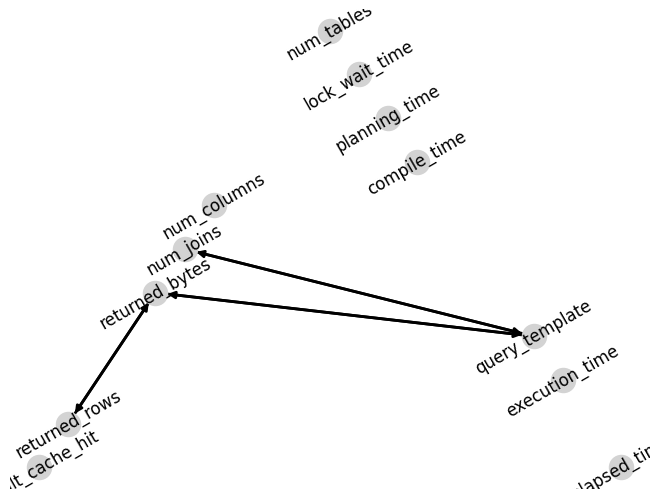

In [134]:
# Draw the graph using labels from the dataframe columns
import matplotlib.pyplot as plt
import networkx as nx



pos = nx.planar_layout(nxg)
nx.draw(
        nxg,
        pos,
        edgelist=nxg.edges(),
        with_labels=False,
        width=2.0,
        node_color="#d3d3d3",
    )
node_labels = {
    i: list(df.columns)[i]
    for i in list(nxg.nodes)
}
text = nx.draw_networkx_labels(nxg, pos, labels=node_labels, font_size=12)
for _, t in text.items():
    t.set_rotation(30)
plt.show()


In [125]:
print(text)

NameError: name 'text' is not defined

In [63]:
for r in df2[df2['sequence'] == 1].iterrows():
    print(len(r[1]['text']))

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000


In [54]:
df.index

RangeIndex(start=0, stop=990, step=1)

In [41]:
df[df['query_template'] == '066']['query_instance'].head()

58     066_008
59     066_009
139    066_000
144    066_001
145    066_002
Name: query_instance, dtype: object

In [58]:
for i,q in enumerate(df['query_rep']):
    print(f"Parsing query {i}")
    n = q.num_tables()

Parsing query 0
Parsing query 1
Parsing query 2
Parsing query 3
Parsing query 4
Parsing query 5
Parsing query 6
Parsing query 7
Parsing query 8
Parsing query 9
Parsing query 10
Parsing query 11
Parsing query 12
Parsing query 13
Parsing query 14
Parsing query 15
Parsing query 16
Parsing query 17
Parsing query 18
Parsing query 19
Parsing query 20
Parsing query 21
Parsing query 22
Parsing query 23
Parsing query 24
Parsing query 25
Parsing query 26
Parsing query 27
Parsing query 28
Parsing query 29
Parsing query 30
Parsing query 31
Parsing query 32
Parsing query 33
Parsing query 34
Parsing query 35
Parsing query 36
Parsing query 37
Parsing query 38
Parsing query 39
Parsing query 40
Parsing query 41
Parsing query 42
Parsing query 43
Parsing query 44
Parsing query 45
Parsing query 46
Parsing query 47
Parsing query 48
Parsing query 49
Parsing query 50
Parsing query 51
Parsing query 52
Parsing query 53
Parsing query 54
Parsing query 55
Parsing query 56
Parsing query 57
Parsing query 58


ParseError: Expecting ). Line 1, Col: 3880.
   = 12  		then ws_net_paid * ws_quantity else 0 end) as dec_net      from           web warehouse_sk [4m=[0m  w_warehouse_sk         and ws_sold_date_sk = d_date_sk         and ws_sold_time_sk = t_time_sk  	a

In [21]:
import sqlglot
import sqlglot.expressions as exp

q = df['query_text'].head().values[0]

# Drop the part of q until the first newline

ast = sqlglot.parse_one(q)

In [22]:
ast

(SELECT expressions: 
  (STAR ), limit: 
  (LIMIT expression: 
    (LITERAL this: 100, is_string: False)), from: 
  (FROM this: 
    (TABLE this: 
      (IDENTIFIER this: v2, quoted: False))), where: 
  (WHERE this: 
    (AND this: 
      (AND this: 
        (EQ this: 
          (COLUMN this: 
            (IDENTIFIER this: d_year, quoted: False)), expression: 
          (LITERAL this: 2000, is_string: False)), expression: 
        (GT this: 
          (COLUMN this: 
            (IDENTIFIER this: avg_monthly_sales, quoted: False)), expression: 
          (LITERAL this: 0, is_string: False))), expression: 
      (GT this: 
        (CASE ifs: 
          (IF this: 
            (GT this: 
              (COLUMN this: 
                (IDENTIFIER this: avg_monthly_sales, quoted: False)), expression: 
              (LITERAL this: 0, is_string: False)), true: 
            (DIV this: 
              (ABS this: 
                (SUB this: 
                  (COLUMN this: 
                    (IDEN